In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
from scipy import misc
import matplotlib.patches as patches

In [0]:
import pandas as pd
import xml.etree.ElementTree as ET
import io
from lxml import objectify


In [0]:
pd.options.display.max_columns = None

In [0]:
car = glob.glob("drive/My Drive/sm_car/*.*")

In [0]:
from natsort import natsorted
car = natsorted(car)

In [0]:
cat_box = glob.glob("drive/My Drive/sm_carlabl/*.*")

In [0]:
cat_box.sort()

In [0]:
cat_box[:5]

['drive/My Drive/sm_carlabl/00001 resized.xml',
 'drive/My Drive/sm_carlabl/00002 resized.xml',
 'drive/My Drive/sm_carlabl/00003 resized.xml',
 'drive/My Drive/sm_carlabl/00004 resized.xml',
 'drive/My Drive/sm_carlabl/00005 resized.xml']

In [0]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text))
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [0]:
df = xml_to_csv("drive/My Drive/sm_carlabl")

In [0]:
df=df.sort_values('filename',ascending=[True])

In [0]:
df = df.reset_index(drop=True)

In [0]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00001 resized.jpg,224,224,car,14,65,215,216
1,00002 resized.jpg,224,224,car,12,46,210,193
2,00003 resized.jpg,224,224,car,28,50,211,177
3,00004 resized.jpg,224,224,car,64,59,160,176
4,00005 resized.jpg,224,224,car,21,69,203,199


In [0]:
car[:5]

['drive/My Drive/sm_car/00001 resized.jpg',
 'drive/My Drive/sm_car/00002 resized.jpg',
 'drive/My Drive/sm_car/00003 resized.jpg',
 'drive/My Drive/sm_car/00004 resized.jpg',
 'drive/My Drive/sm_car/00005 resized.jpg']

In [0]:
import cv2
train_data = np.array([cv2.imread(fname) for fname in car])

In [0]:
train_data.max()

255

In [0]:
t = train_data/255

In [0]:
t.max()

1.0

In [0]:
t.shape

(236, 224, 224, 3)

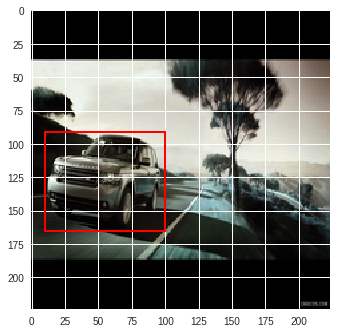

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[30])
rect = patches.Rectangle((df['xmin'][30],df['ymin'][30]),df['xmax'][30] - df['xmin'][30],df['ymax'][30] - df['ymin'][30],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.show()

In [0]:
lable = df[['xmin','ymin','xmax','ymax']].copy()

In [0]:
l= []
for i in range(0,256,32):
  for j in range(i+32,256,32):
    for k in range(0,256,32):
      for m in range(k+32,256,32):
        l.append([i,j,k,m])
        break
    break
       

In [0]:
column_name = ['ymin', 'ymax', 'xmin', 'xmax']
grid = pd.DataFrame(l, columns=column_name)

In [0]:
grid.shape

(49, 4)

In [0]:
grid.head()

,ymin,ymax,xmin,xmax
0,0,32,0,32
1,0,32,32,64
2,0,32,64,96
3,0,32,96,128
4,0,32,128,160


In [0]:
ctr = pd.DataFrame()

In [0]:
ctr['x_ctr'] = (lable.xmin+lable.xmax)/2
ctr['y_ctr'] = (lable.ymin+lable.ymax)/2

In [0]:
ctr.head()

,x_ctr,y_ctr
0,114.5,140.5
1,111.0,119.5
2,119.5,113.5
3,112.0,117.5
4,112.0,134.0


In [0]:
temp = pd.DataFrame(np.nan, index=range(0,236), columns=['grid0','grid1','grid2','grid3','grid4','grid5','grid6','grid7','grid8','grid9','grid10','grid11','grid12','grid13','grid14','grid15','grid16','grid17','grid18','grid19','grid20','grid21','grid22','grid23','grid24','grid25','grid26','grid27','grid28','grid29','grid30','grid31','grid32','grid33','grid34','grid35','grid36','grid37','grid38','grid39','grid40','grid41','grid42','grid43','grid44','grid45','grid46','grid47','grid48'])

In [0]:
temp.head()

,grid0,grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10,grid11,grid12,grid13,grid14,grid15,grid16,grid17,grid18,grid19,grid20,grid21,grid22,grid23,grid24,grid25,grid26,grid27,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37,grid38,grid39,grid40,grid41,grid42,grid43,grid44,grid45,grid46,grid47,grid48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
for i in range(len(ctr)):
  centr = grid[(grid['xmax'] >= ctr.iloc[i][0]) & (grid['ymax'] >=ctr.iloc[i][1])].index[0]
  temp.iloc[i][centr] = 1

In [0]:
temp.fillna(0,inplace=True)

In [0]:
temp.head()

,grid0,grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10,grid11,grid12,grid13,grid14,grid15,grid16,grid17,grid18,grid19,grid20,grid21,grid22,grid23,grid24,grid25,grid26,grid27,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37,grid38,grid39,grid40,grid41,grid42,grid43,grid44,grid45,grid46,grid47,grid48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


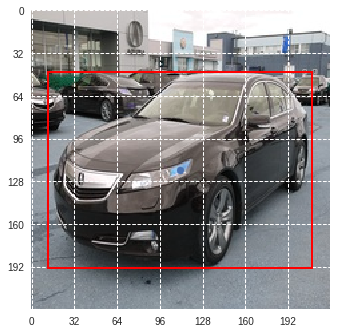

In [0]:
import matplotlib.ticker as plticker
fig,ax = plt.subplots(1)
ax.imshow(train_data[1])

intervals = 32

loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

rect = patches.Rectangle((df['xmin'][1],df['ymin'][1]),df['xmax'][1] - df['xmin'][1],df['ymax'][1] - df['ymin'][1],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.grid(color='w',which='major', linestyle='--', linewidth=1)
plt.scatter(ctr.iloc[1][0], ctr.iloc[1][1])
plt.show()

In [0]:
lable['width'] = lable.xmax - lable.xmin
lable['height'] = lable.ymax - lable.ymin

In [0]:
del lable['xmin'], lable['ymin'],lable['xmax'], lable['ymax']

In [0]:
del lable['xmax'], lable['ymax']

In [0]:
lable=pd.concat([ctr, lable], axis=1)

In [0]:
lable.head()

,xmin,ymin,width,height
0,14,65,201,151
1,12,46,198,147
2,28,50,183,127
3,64,59,96,117
4,21,69,182,130


In [0]:
lable=pd.concat([temp, lable], axis=1)

In [0]:
lable.head()

,grid0,grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10,grid11,grid12,grid13,grid14,grid15,grid16,grid17,grid18,grid19,grid20,grid21,grid22,grid23,grid24,grid25,grid26,grid27,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37,grid38,grid39,grid40,grid41,grid42,grid43,grid44,grid45,grid46,grid47,grid48,xmin,ymin,width,height
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,65,201,151
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,46,198,147
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,50,183,127
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,59,96,117
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,69,182,130


In [0]:
lable.shape

(236, 53)

In [0]:
lable_train=lable[:186].copy()
lable_val =  lable[186:].copy()

In [0]:
lable_train.max()

In [0]:
lable_train[['xmin','ymin']] = (lable_train[['xmin','ymin']])/224
lable_val[['xmin','ymin']] = (lable_val[['xmin','ymin']])/224

lable_train[['width','height']] = lable_train[['width','height']]/224
lable_val[['width','height']] = lable_val[['width','height']]/224

In [0]:
lable_train[['xmin','ymin']].max(),lable_train[['width','height']].max()

(xmin    0.441964
 ymin    0.660714
 dtype: float64, width     0.995536
 height    0.995536
 dtype: float64)

In [0]:
lable_train.head(6)

,grid0,grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10,grid11,grid12,grid13,grid14,grid15,grid16,grid17,grid18,grid19,grid20,grid21,grid22,grid23,grid24,grid25,grid26,grid27,grid28,grid29,grid30,grid31,grid32,grid33,grid34,grid35,grid36,grid37,grid38,grid39,grid40,grid41,grid42,grid43,grid44,grid45,grid46,grid47,grid48,xmin,ymin,width,height
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,0.290179,0.897321,0.674107
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.205357,0.883929,0.656250
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.223214,0.816964,0.566964
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.263393,0.428571,0.522321
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093750,0.308036,0.812500,0.580357
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437500,0.660714,0.459821,0.308036


In [0]:
t[186:].shape

(50, 224, 224, 3)

In [0]:
val_train =t[186:]
val_train.shape

(50, 224, 224, 3)

In [0]:
t = t[:186]
t.shape

(186, 224, 224, 3)

In [0]:
t.shape,lable_train.shape,val_train.shape,lable_val.shape

((186, 224, 224, 3), (186, 53), (50, 224, 224, 3), (50, 53))

In [0]:
l= []
for i in range(0,8,1):
  for j in range(i+1,8,1):
    for k in range(0,8,1):
      for m in range(k+1,8,1):
        l.append((i,j,k,m))
        break
    break

In [0]:
grid_ = pd.DataFrame(l)
grid_.columns = [['ymin','ymax','xmin','xmax']]


In [0]:
grid_.head(8)

,ymin,ymax,xmin,xmax
0,0,1,0,1
1,0,1,1,2
2,0,1,2,3
3,0,1,3,4
4,0,1,4,5
5,0,1,5,6
6,0,1,6,7
7,1,2,0,1


In [0]:
grid.iloc[0].values

array([0, 1, 0, 1])

In [0]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 224, 224, 3], name='input_data')
y = tf.placeholder(tf.float32, [None, 53], name='target_data')

In [0]:
np.random.seed(101) 
tf.set_random_seed(101) 

In [0]:
#dis = tf.add(tf.square(y[0] -logit1[0]),tf.square(y[1] -logit1[1]))
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit1[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit1[2])))

In [0]:
def smooth_l1_loss(y_true, y_pred):
  
  """Implements Smooth-L1 loss.
  y_true and y_pred are typically: [N, 4], but could be any shape.
  """
  diff = tf.abs(y_true - y_pred)
  less_than_one = tf.cast(tf.less(diff, 1.0), "float32")
  loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
  return loss

def overlaps_graph(boxes1, boxes2):
    """Computes IoU overlaps between two sets of boxes.
    boxes1, boxes2: [N, (y1, x1, y2, x2)].
    """
    # 1. Tile boxes2 and repeat boxes1. This allows us to compare
    # every boxes1 against every boxes2 without loops.
    # TF doesn't have an equivalent to np.repeat() so simulate it
    # using tf.tile() and tf.reshape.
    b1 = tf.reshape(tf.tile(tf.expand_dims(boxes1, 1),
                            [1, 1, tf.shape(boxes2)[0]]), [-1, 4])
    b2 = tf.tile(boxes2, [tf.shape(boxes1)[0], 1])
    # 2. Compute intersections
    b1_y1, b1_x1, b1_y2, b1_x2 = tf.split(b1, 4, axis=1)
    b2_y1, b2_x1, b2_y2, b2_x2 = tf.split(b2, 4, axis=1)
    y1 = tf.maximum(b1_y1, b2_y1)
    x1 = tf.maximum(b1_x1, b2_x1)
    y2 = tf.minimum(b1_y2, b2_y2)
    x2 = tf.minimum(b1_x2, b2_x2)
    intersection = tf.maximum(x2 - x1, 0) * tf.maximum(y2 - y1, 0)
    # 3. Compute unions
    b1_area = (b1_y2 - b1_y1) * (b1_x2 - b1_x1)
    b2_area = (b2_y2 - b2_y1) * (b2_x2 - b2_x1)
    union = b1_area + b2_area - intersection
    # 4. Compute IoU and reshape to [boxes1, boxes2]
    iou = intersection / union
    overlaps = tf.reshape(iou, [tf.shape(boxes1)[0], tf.shape(boxes2)[0]])
    return overlaps
  
def rms1(y,logit):
  loss = tf.sqrt(tf.reduce_mean(tf.square(y -logit)))
  return loss

def rms(y,logit):
  loss = tf.norm(y-logit, ord='euclidean')
  loss = tf.reduce_sum(loss)
  return loss


def yl(y,logit):
  dis = tf.reduce_sum(tf.add(tf.square(y[:,25] -logit[:,25]),tf.square(y[:,26] -logit[:,26])))*5
  co =  tf.reduce_sum(tf.add(tf.square(tf.sqrt(y[:,27]) -tf.sqrt(logit[:,27])),tf.square(tf.sqrt(y[:,28]) -tf.sqrt(logit[:,28]))))*5
  noobj = tf.reduce_sum((tf.square(y[:,:25] -logit[:,:25])))
  loss = tf.add(dis,co)
  loss = tf.add(loss,noobj)
  return loss



In [0]:
print(y[:,0])

Tensor("strided_slice:0", shape=(?,), dtype=float32)


In [0]:
grid.iloc[0][1]

45

In [0]:
def logit_recur(enc_conv2,grid_,y):
  con = []
  re_loss = []
  
  for i in range(len(grid_)):
    g = enc_conv2[:,grid_.iloc[i][0]:grid_.iloc[i][1],grid_.iloc[i][2]:grid_.iloc[i][3]]

    flat = tf.layers.flatten(g)
    h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
    h1 = tf.layers.dropout(h1,0.1)
    h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
    logit = tf.layers.dense(h2,53,activation = None)
    reconstruction_loss = rms1(y,logit)*y[:,i:i+1]
    
    #dis = tf.reduce_sum(tf.add(tf.square(y[:,25:26] -logit[:,25:26]),tf.square(y[:,26:27] -logit[:,26:27]))*y[:,i:i+1])*5
    
    #co =  tf.reduce_sum(tf.add(tf.square(tf.sqrt(y[:,27:28]) -tf.sqrt(logit[:,27:28])),tf.square(tf.sqrt(y[:,28:29]) -tf.sqrt(logit[:,28:29])))*y[:,i:i+1])*5
    
    #noobj = tf.reduce_sum((tf.square(y[:,i] -logit[:,i])))
    
    #reconstruction_loss = tf.add(dis,co)
    #reconstruction_loss = tf.add(reconstruction_loss,noobj)
    
    con.append(logit)
    re_loss.append(reconstruction_loss)
  #print(re_loss.shape)
  return(con,re_loss)

In [0]:
grid_.iloc[0]

ymin    0
ymax    1
xmin    0
xmax    1
Name: 0, dtype: int64

In [0]:
grid_

In [0]:
grid_.iloc[7][0],grid_.iloc[7][2]

(1, 0)

In [0]:
def _new_loss(logits,y,grid_):
  #im[imag.no,row.colm,channel]
  
  re_loss = []
  
  for i in range(len(grid_)):
    loss = tf.sqrt(tf.reduce_mean(tf.square(y -logits[:,grid_.loc[i][0],grid_.loc[i][2],:])))*y[:,i]
    re_loss.append(loss)
  
  return re_loss

def _new_yl(logit,y,grid_):
  #im[imag.no,row.colm,channel]
  
  for i in range(len(grid_)):

    dis = tf.reduce_sum(tf.add(tf.square(y[:,25] -logit[:,grid_.loc[i][0],grid_.loc[i][2],25]),tf.square(y[:,26] -logit[:,grid_.loc[i][0],grid_.loc[i][2],26])))*5*y[:,i]
    co =  tf.reduce_sum(tf.add(tf.square(tf.sqrt(y[:,27]) -tf.sqrt(logit[:,grid_.loc[i][0],grid_.loc[i][2],27])),tf.square(tf.sqrt(y[:,28]) -tf.sqrt(logit[:,grid_.loc[i][0],grid_.loc[i][2],28]))))*5*y[:,i]
    noobj = tf.reduce_sum((tf.square(y[:,:25] -logit[:,grid_.loc[i][0],grid_.loc[i][2],:25])))
    loss = tf.add(dis,co)
    loss = tf.add(loss,noobj)
  
  return loss

In [0]:
epochs = 20
batch_size=10
l2_reg = 0.0001
#encoding-----
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

enc_conv0 = tf.layers.conv2d(x, 64, 7,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv0 = tf.layers.max_pooling2d(enc_conv0, 2, 2)
print(enc_conv0)

enc_conv1 = tf.layers.conv2d(enc_conv0, 192, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv1 = tf.layers.max_pooling2d(enc_conv1, 2, 2)
print(enc_conv1)

enc_conv2 = tf.layers.conv2d(enc_conv1, 128, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.max_pooling2d(enc_conv2, 2, 2)
print(enc_conv2)

enc_conv3 = tf.layers.conv2d(enc_conv2, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.max_pooling2d(enc_conv3, 2, 2)
print(enc_conv3)

enc_conv4 = tf.layers.conv2d(enc_conv3, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,strides = (2,2),padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)

print(enc_conv4)

enc_conv5 = tf.layers.conv2d(enc_conv4, 4096, 1, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3

logits = tf.layers.conv2d(enc_conv4, 53, 1, activation=None, kernel_regularizer=l2_regularizer) #3

#loss = tf.stack(_new_loss(logits,y,grid_))
loss = _new_yl(logits,y,grid_)
#im[imag.no,row.colm,channel]
#pred,r_los = logit_recur(enc_conv4,grid_,y)

#logits = tf.stack(pred)
#loss =  tf.stack(r_los)

#reconstruction_loss = tf.reduce_sum(loss)
cost =  loss


print(logits)
print(cost)

opt = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 56, 56, 192), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 28, 28, 512), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 14, 14, 1024), dtype=float32)
Tensor("conv2d_23/Elu:0", shape=(?, 7, 7, 1024), dtype=float32)
Tensor("conv2d_25/BiasAdd:0", shape=(?, 7, 7, 53), dtype=float32)
Tensor("Add_195:0", shape=(?,), dtype=float32)


### arch2

In [0]:
epochs = 10
batch_size=10
l2_reg = 0.0001
#encoding-----
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

enc_conv0 = tf.layers.conv2d(x, 64, 7,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv0 = tf.layers.max_pooling2d(enc_conv0, 2, 2)
print(enc_conv0)

enc_conv1 = tf.layers.conv2d(enc_conv0, 192, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv1 = tf.layers.max_pooling2d(enc_conv1, 2, 2)
print(enc_conv1)

enc_conv2 = tf.layers.conv2d(enc_conv1, 128, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.conv2d(enc_conv2, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv2 = tf.layers.max_pooling2d(enc_conv2, 2, 2)
print(enc_conv2)

enc_conv3 = tf.layers.conv2d(enc_conv2, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 512, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 256, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.conv2d(enc_conv3, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv3 = tf.layers.max_pooling2d(enc_conv3, 2, 2)
print(enc_conv3)

enc_conv4 = tf.layers.conv2d(enc_conv3, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 512, 1,activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,strides = (2,2),padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)
enc_conv4 = tf.layers.conv2d(enc_conv4, 1024, 3,padding = 'SAME',activation=tf.nn.elu, kernel_regularizer=l2_regularizer)

print(enc_conv4)

pred,r_los = logit_recur(enc_conv4,grid_,y)

logits = tf.stack(pred)
loss =  tf.stack(r_los)

reconstruction_loss = tf.reduce_mean(loss)
cost = loss


print(logits)
print(cost)

opt = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

Tensor("max_pooling2d/MaxPool:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 56, 56, 192), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 28, 28, 512), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 14, 14, 1024), dtype=float32)
Tensor("conv2d_23/Elu:0", shape=(?, 7, 7, 1024), dtype=float32)
Tensor("stack:0", shape=(49, ?, 53), dtype=float32)
Tensor("stack_1:0", shape=(49, ?, 1), dtype=float32)


### arch1

In [0]:
epochs = 10
batch_size=10
l2_reg = 0.0001
#encoding-----
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

enc_conv0 = tf.layers.conv2d(x, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv0 = tf.layers.conv2d(enc_conv0, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv0)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #111

enc_conv1 = tf.layers.conv2d(enc_max1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv1)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #53

enc_conv2 = tf.layers.conv2d(enc_max1, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_max2 = tf.layers.max_pooling2d(enc_conv2, 2, 2) #23

#enc_conv2 = tf.layers.conv2d(enc_max2, 128, 5, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_max2, 200, 19, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
enc_conv2 = tf.layers.conv2d(enc_conv2, 200, 1, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
print(enc_conv2)

pred,r_los = logit_recur(enc_conv2,grid_,y)

logits = tf.stack(pred)
loss =  tf.stack(r_los)

#reconstruction_loss = tf.reduce_sum(loss)
cost = loss


print(logits)
print(cost)

opt = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

Tensor("conv2d_9/Elu:0", shape=(?, 5, 5, 200), dtype=float32)
Tensor("stack:0", shape=(25, ?, 29), dtype=float32)
Tensor("stack_1:0", shape=(25, ?, 1), dtype=float32)


In [0]:
Tensor("stack_1:0", shape=(25,), dtype=float32)

### arch

In [0]:
epochs = 10
batch_size=10
l2_reg = 0.0001
#encoding-----
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

enc_conv0 = tf.layers.conv2d(x, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv0 = tf.layers.conv2d(enc_conv0, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv0)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #111

enc_conv1 = tf.layers.conv2d(enc_max1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv1)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #53

enc_conv2 = tf.layers.conv2d(enc_max1, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_max2 = tf.layers.max_pooling2d(enc_conv2, 2, 2) #23

#enc_conv2 = tf.layers.conv2d(enc_max2, 128, 5, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_max2, 128, 21, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
enc_conv2 = tf.layers.conv2d(enc_conv2, 128, 1, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
print(enc_conv2)

g1 = enc_conv2[:,grid.iloc[0][0]:grid.iloc[0][1],grid.iloc[0][2]:grid.iloc[0][3]]
g2 = enc_conv2[:,grid.iloc[1][0]:grid.iloc[1][1],grid.iloc[1][2]:grid.iloc[1][3]]
g3 = enc_conv2[:,grid.iloc[2][0]:grid.iloc[2][1],grid.iloc[2][2]:grid.iloc[2][3]]
g4 = enc_conv2[:,grid.iloc[3][0]:grid.iloc[3][1],grid.iloc[3][2]:grid.iloc[3][3]]
g5 = enc_conv2[:,grid.iloc[4][0]:grid.iloc[4][1],grid.iloc[4][2]:grid.iloc[4][3]]
g6 = enc_conv2[:,grid.iloc[5][0]:grid.iloc[5][1],grid.iloc[5][2]:grid.iloc[5][3]]
g7 = enc_conv2[:,grid.iloc[6][0]:grid.iloc[6][1],grid.iloc[6][2]:grid.iloc[6][3]]
g8 = enc_conv2[:,grid.iloc[7][0]:grid.iloc[7][1],grid.iloc[7][2]:grid.iloc[7][3]]
g9 = enc_conv2[:,grid.iloc[8][0]:grid.iloc[8][1],grid.iloc[8][2]:grid.iloc[8][3]]
print(g1)
flat = tf.layers.flatten(g1)
##1--
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit1 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit1[0]),tf.square(y[1] -logit1[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit1[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit1[2])))*5
#reconstruction_loss1 = tf.add(dis,co)
reconstruction_loss1 = rms(y,logit1)
#reconstruction_loss1 = reconstruction_loss1 +box
#reconstruction_loss1 = tf.sqrt(tf.reduce_mean(tf.square(y -logit1)))

##2--
flat = tf.layers.flatten(g2)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit2 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit2[0]),tf.square(y[1] -logit2[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit2[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit2[2])))*5
reconstruction_loss2 = rms(y,logit2)
#box = overlaps_graph(y,logit2)
#reconstruction_loss2 = reconstruction_loss2 +box

##3--
flat = tf.layers.flatten(g3)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit3 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit3[0]),tf.square(y[1] -logit3[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit3[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit3[2])))*5
reconstruction_loss3 = rms(y,logit3)
#box = overlaps_graph(y,logit3)
#reconstruction_loss3 = reconstruction_loss3 +box

##4--
flat = tf.layers.flatten(g4)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit4 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit4[0]),tf.square(y[1] -logit4[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit4[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit4[2])))*5
reconstruction_loss4 = rms(y,logit4)
#box = overlaps_graph(y,logit4)
#reconstruction_loss4 = reconstruction_loss4 +box


##5--
flat = tf.layers.flatten(g5)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit5 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit5[0]),tf.square(y[1] -logit5[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit5[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit5[2])))*5
reconstruction_loss5 = rms(y,logit5)
#box = overlaps_graph(y,logit5)
#reconstruction_loss5 = reconstruction_loss5 +box

##6--
flat = tf.layers.flatten(g6)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit6 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit6[0]),tf.square(y[1] -logit6[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit6[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit6[2])))*5
reconstruction_loss6 = rms(y,logit6)
#box = overlaps_graph(y,logit6)
#reconstruction_loss6 = reconstruction_loss6 +box

##7--
flat = tf.layers.flatten(g7)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit7 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit7[0]),tf.square(y[1] -logit7[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit7[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit7[2])))*5
reconstruction_loss7 = rms(y,logit7)
#box = overlaps_graph(y,logit7)
#reconstruction_loss7 = reconstruction_loss7 +box

##8--
flat = tf.layers.flatten(g8)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit8 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit8[0]),tf.square(y[1] -logit8[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit8[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit8[2])))*5
reconstruction_loss8 = rms(y,logit8)
#box = overlaps_graph(y,logit8)
#reconstruction_loss8 = reconstruction_loss8 +box


##9--
flat = tf.layers.flatten(g9)
h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
h1 = tf.layers.dropout(h1,0.1)
h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
logit9 = tf.layers.dense(h2,4,activation = None)

#dis = tf.add(tf.square(y[0] -logit9[0]),tf.square(y[1] -logit9[1]))*5
#co =  tf.add(tf.square(tf.sqrt(y[2]) -tf.sqrt(logit9[2])),tf.square(tf.sqrt(y[2]) -tf.sqrt(logit9[2])))*5
reconstruction_loss9 = rms(y,logit9)
#box = overlaps_graph(y,logit9)
#reconstruction_loss9 = reconstruction_loss9 +box


logits = tf.stack([logit1, logit2, logit3,logit4, logit5, logit6,logit7, logit8,logit9])
print(logits)

loss = tf.stack([reconstruction_loss1, reconstruction_loss2, reconstruction_loss3,reconstruction_loss4, reconstruction_loss5, reconstruction_loss6,reconstruction_loss7, reconstruction_loss8,reconstruction_loss9])
reconstruction_loss = tf.reduce_mean(loss)
  #reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

cost = reconstruction_loss

opt = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
#acc, acc_op = tf.metrics.accuracy(labels=tf.argmax(y, 1), predictions=tf.argmax(logits,1))

Tensor("conv2d_9/Elu:0", shape=(?, 3, 3, 128), dtype=float32)
Tensor("strided_slice:0", shape=(?, 1, 1, 128), dtype=float32)
Tensor("stack:0", shape=(9, ?, 4), dtype=float32)


### training


In [0]:
t.shape,lable_train.shape,val_train.shape,lable_val.shape

((186, 224, 224, 3), (186, 53), (50, 224, 224, 3), (50, 53))

In [0]:
sess=tf.Session()
sess.run(tf.local_variables_initializer())
sess.run(tf.global_variables_initializer())


avg_loss =[]
val_loss =[]
for e_vals in range(epochs):
    cal_loss =[]
    vl_loss =[]
    for bat in range(int(len(t) / batch_size)):
        batch_data = t[bat * batch_size:bat * batch_size + batch_size]
        batch_fin = lable_train[bat * batch_size:bat * batch_size + batch_size]
        img,batch_cost,_ = sess.run([logits,cost, opt], feed_dict={x: batch_data,y: batch_fin})
        
        cal_loss.append(batch_cost)
        print("\r {0}/{1}[{2}>{3}] {4}".format(bat+1,int(len(t) / batch_size),'=' * (bat+1),'.'*(int(len(t) / batch_size)-bat-1),batch_cost),end="")
    
    for val_bat in range(int(len(val_train) / batch_size)):
        batch_data = val_train[val_bat * batch_size:val_bat * batch_size + batch_size]
        batch_fin = lable_val[val_bat * batch_size:val_bat * batch_size + batch_size]
        img,val_cost = sess.run([logits,cost], feed_dict={x: batch_data,y: batch_fin})
        vl_loss.append(val_cost)
    
    tloss = np.array(cal_loss)
    tloss = tloss.mean()
    
    vloss = np.array(vl_loss)
    vloss = vloss.mean()
    
    avg_loss.append(tloss)
    val_loss.append(vloss)
    
    # accuracy
    #img,accuracy = sess.run([logits,acc_op], feed_dict={x: t,y:lable_train})
    #img= sess.run([logits], feed_dict={x: val_train,y:lable_val})
    
    print("\n")
    print(('Epoch: {}/{}...').format(e_vals + 1, epochs), ('Training loss: {:.4f}').format(tloss),('Validation loss: {:.4f}').format(vloss))
    print("\n")

 11/18[===========>.......] [nan nan nan nan nan nan nan nan nan nan]

KeyboardInterrupt: ignored

In [0]:
im = sess.run(enc_conv2,feed_dict={x: t[0:1]})

In [0]:
im[0,0,27,0]

0.06590499

In [0]:
#im[imag.no,row.colm,channel]

In [0]:
im.shape

(1, 112, 112, 64)

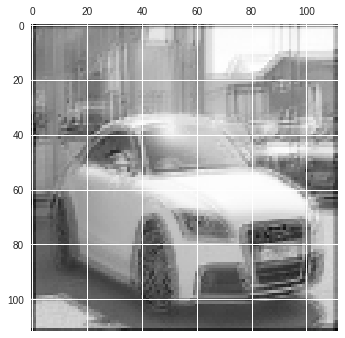

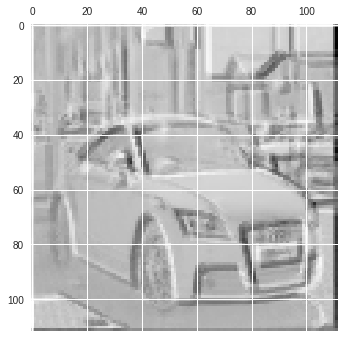

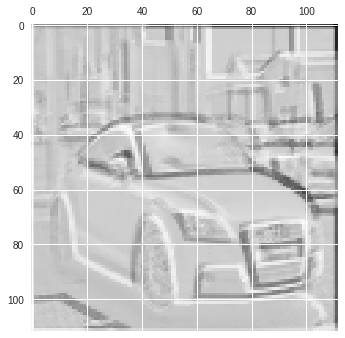

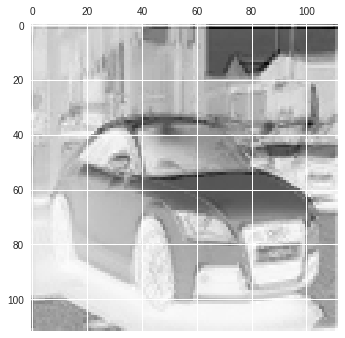

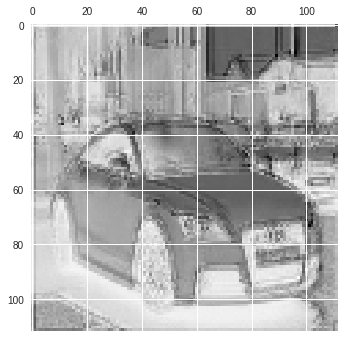

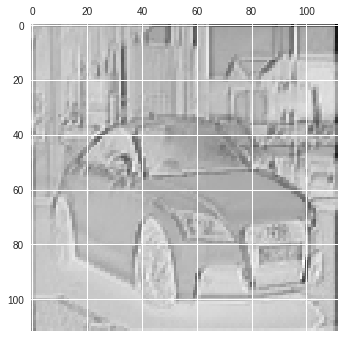

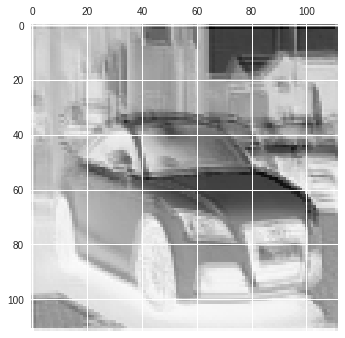

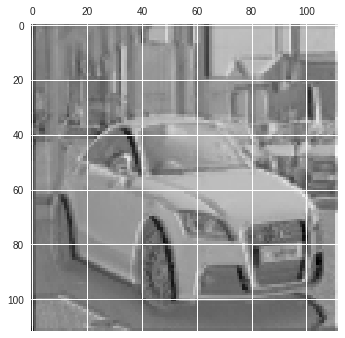

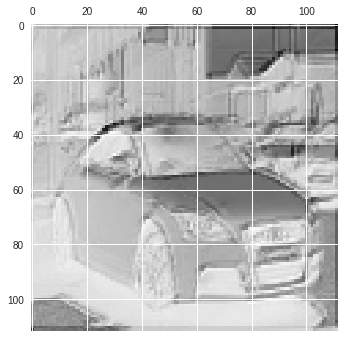

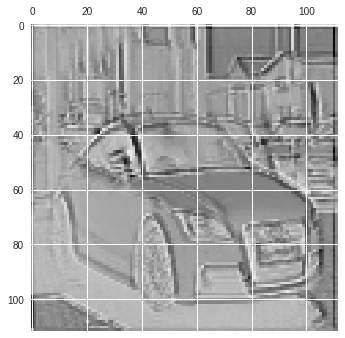

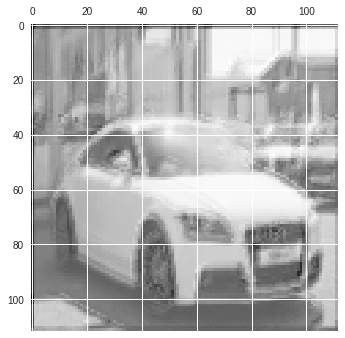

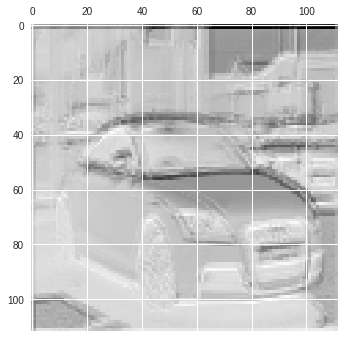

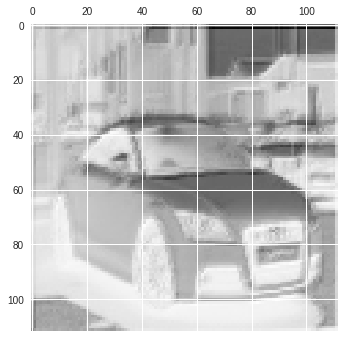

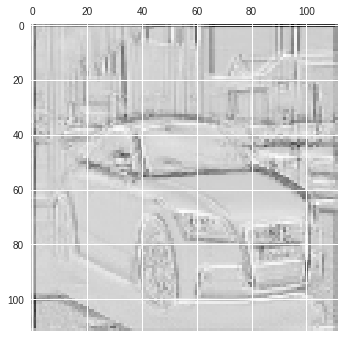

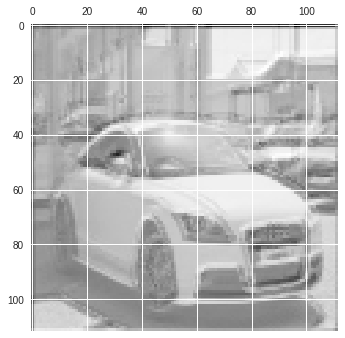

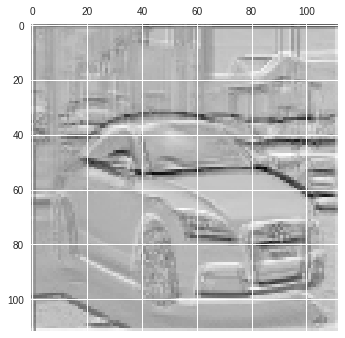

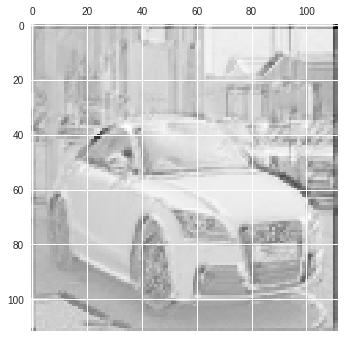

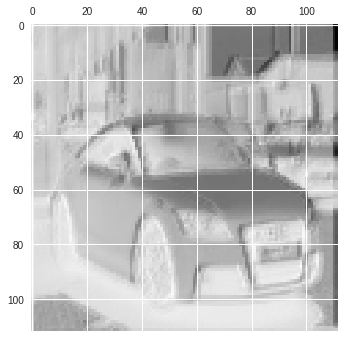

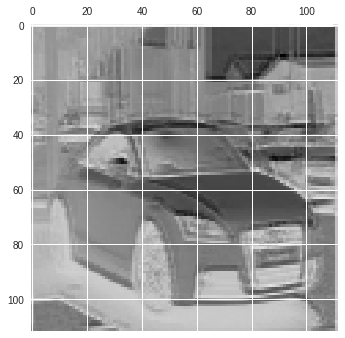

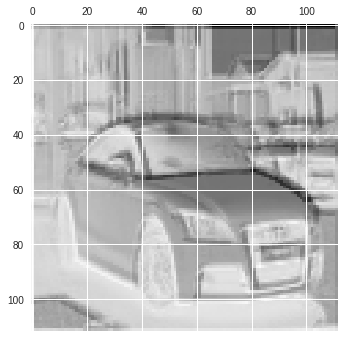

In [0]:
for i in range(20):
  plt.matshow(im[0,:,:,i])
plt.show()

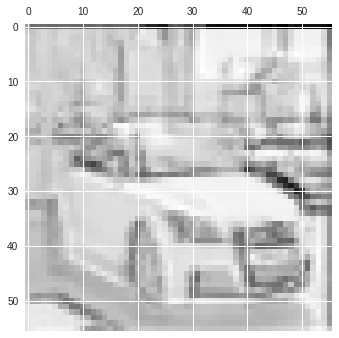

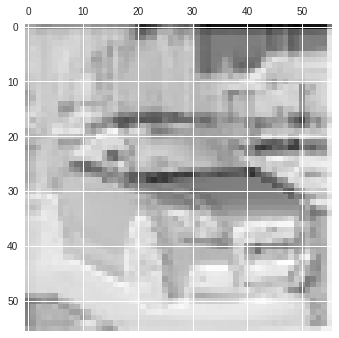

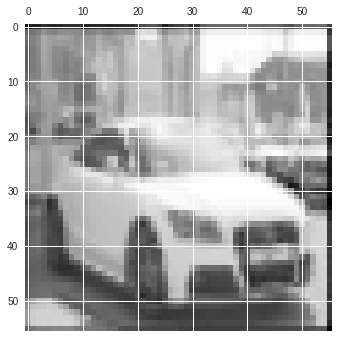

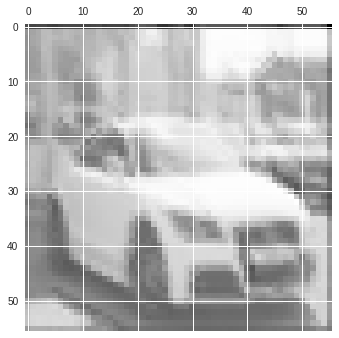

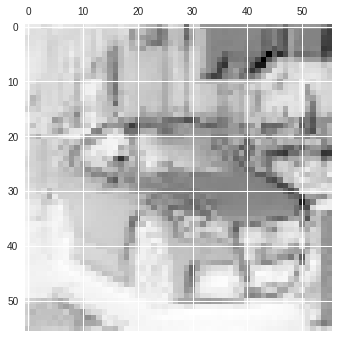

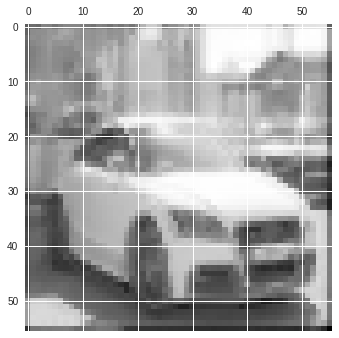

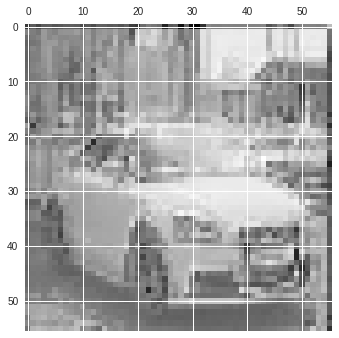

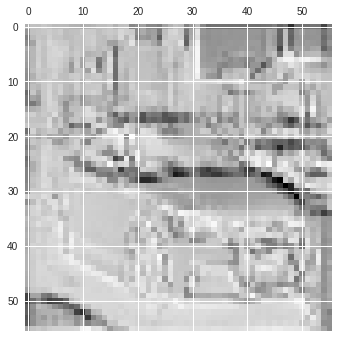

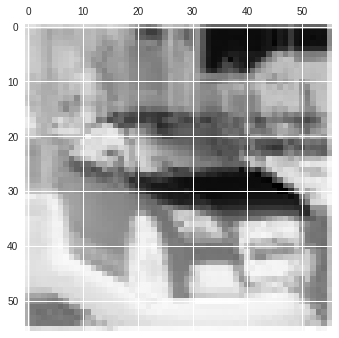

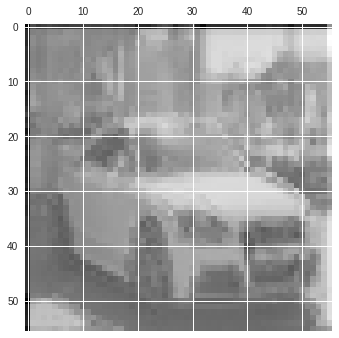

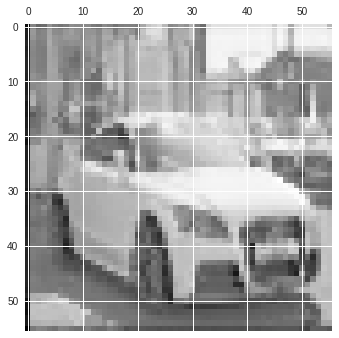

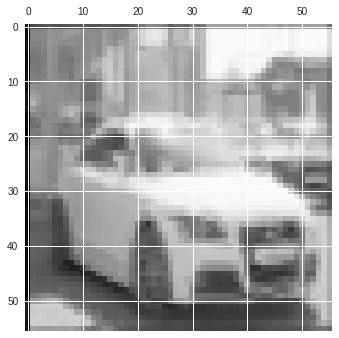

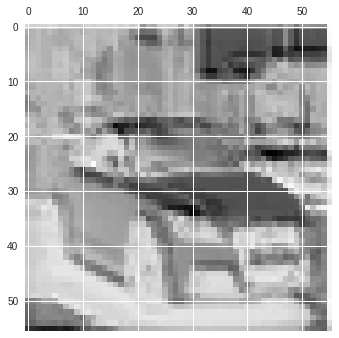

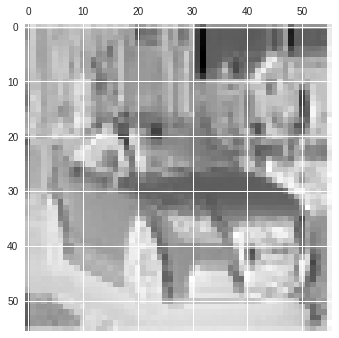

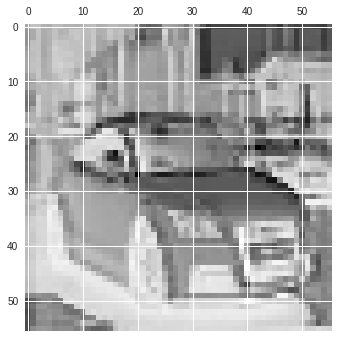

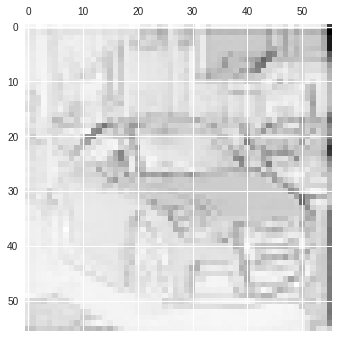

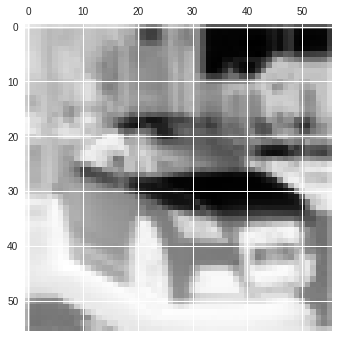

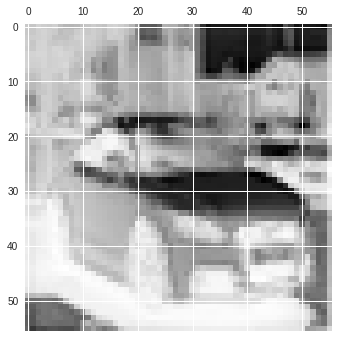

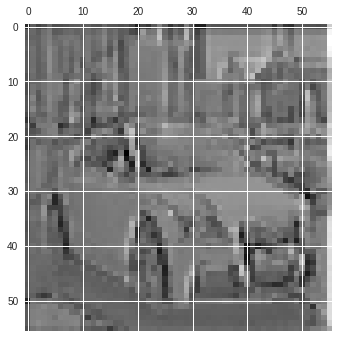

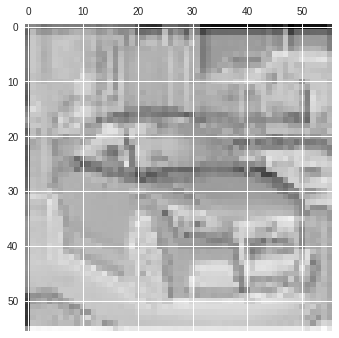

In [0]:
for i in range(20):
  plt.matshow(im[0,:,:,i])
plt.show()

In [0]:
img2 = sess.run(logits, feed_dict={x: [t[40]]})
#im[imag.no,row.colm,channel]

In [0]:
im = img2.copy()

In [0]:
im.shape

(1, 7, 7, 53)

In [0]:
for i in range(7):
  for j in range(7):
    im[:,i,j,49:] = (im[:,i,j,49:])*224 
    #im[i][0][28] = (im[i][0][26])*224 

In [0]:
im = abs(im)

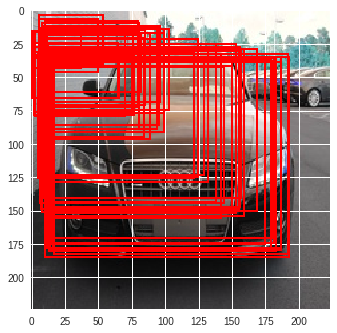

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[40])
for i in range(7):
  for j in range(7):
    rect = patches.Rectangle((im[:,i,j,49],im[:,i,j,50]),im[:,i,j,51],im[:,i,j,52],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

In [0]:
lable.iloc[40]

grid0       0.0
grid1       0.0
grid2       0.0
grid3       0.0
grid4       0.0
grid5       0.0
grid6       0.0
grid7       0.0
grid8       0.0
grid9       0.0
grid10      0.0
grid11      0.0
grid12      0.0
grid13      0.0
grid14      0.0
grid15      0.0
grid16      0.0
grid17      0.0
grid18      0.0
grid19      0.0
grid20      0.0
grid21      0.0
grid22      0.0
grid23      0.0
grid24      1.0
grid25      0.0
grid26      0.0
grid27      0.0
grid28      0.0
grid29      0.0
grid30      0.0
grid31      0.0
grid32      0.0
grid33      0.0
grid34      0.0
grid35      0.0
grid36      0.0
grid37      0.0
grid38      0.0
grid39      0.0
grid40      0.0
grid41      0.0
grid42      0.0
grid43      0.0
grid44      0.0
grid45      0.0
grid46      0.0
grid47      0.0
grid48      0.0
xmin       20.0
ymin       24.0
width     176.0
height    165.0
Name: 40, dtype: float64

In [0]:

for i in range(7):
  for j in range(7):
    fig,ax = plt.subplots(1)
    ax.imshow(t[40])
    
    intervals = 32

    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    
    rect = patches.Rectangle((im[:,i,j,49],im[:,i,j,50]),im[:,i,j,51],im[:,i,j,52],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.grid(color='w',which='major', linestyle='--', linewidth=1)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[30])
rect = patches.Rectangle((img[0][0][0],img[0][0][1]),img[0][0][2] - img[0][0][0],img[0][0][3] - img[0][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect1 = patches.Rectangle((img[1][0][0],img[1][0][1]),img[1][0][2] - img[1][0][0],img[1][0][3] - img[1][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((img[2][0][0],img[2][0][1]),img[1][0][2] - img[2][0][0],img[2][0][3] - img[2][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect3 = patches.Rectangle((img[3][0][0],img[3][0][1]),img[3][0][2] - img[3][0][0],img[3][0][3] - img[3][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect4 = patches.Rectangle((img[4][0][0],img[4][0][1]),img[4][0][2] - img[4][0][0],img[4][0][3] - img[4][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect5 = patches.Rectangle((img[5][0][0],img[5][0][1]),img[5][0][2] - img[5][0][0],img[5][0][3] - img[5][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect6 = patches.Rectangle((img[6][0][0],img[6][0][1]),img[6][0][2] - img[6][0][0],img[6][0][3] - img[6][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect7 = patches.Rectangle((img[7][0][0],img[7][0][1]),img[7][0][2] - img[7][0][0],img[7][0][3] - img[7][0][1],linewidth=2,edgecolor='r',facecolor='none')
rect8 = patches.Rectangle((img[8][0][0],img[8][0][1]),img[8][0][2] - img[8][0][0],img[8][0][3] - img[8][0][1],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect7)
ax.add_patch(rect8)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.show()

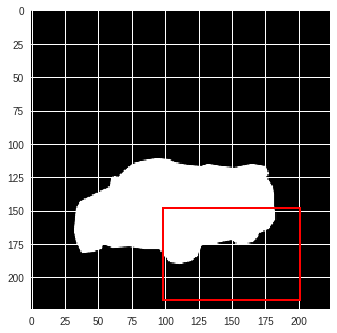

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[64])
rect = patches.Rectangle((df['xmin'][5],df['ymin'][5]),df['xmax'][5] - df['xmin'][5],df['ymax'][5] - df['ymin'][5],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.show()

In [0]:
img = pd.DataFrame(img2)
img.columns = ['xmin','ymin','xmax','ymax']
img.head()

In [0]:
epochs = 20
batch_size=10
l2_reg = 0.0001
#encoding-----
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

enc_conv0 = tf.layers.conv2d(x, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv0 = tf.layers.conv2d(enc_conv0, 64, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv0)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #111

enc_conv1 = tf.layers.conv2d(enc_max1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
enc_conv1 = tf.layers.conv2d(enc_conv1, 128, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #223
#enc_max = tf.layers.max_pooling2d(enc_conv0, 3, 2) # 56
en_locl = tf.nn.local_response_normalization(enc_conv1)
enc_max1 = tf.layers.max_pooling2d(en_locl, 2, 2) #53

enc_conv2 = tf.layers.conv2d(enc_max1, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_conv2, 256, 3, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_max2 = tf.layers.max_pooling2d(enc_conv2, 2, 2) #23

#enc_conv2 = tf.layers.conv2d(enc_max2, 128, 5, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #108
enc_conv2 = tf.layers.conv2d(enc_max2, 128, 21, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
enc_conv2 = tf.layers.conv2d(enc_conv2, 128, 1, activation=tf.nn.elu, kernel_regularizer=l2_regularizer) #3
print(enc_conv2)

for i in grid.values:
  g = enc_conv2[:,i[0]:i[1],i[2]:i[3]]
  flat = tf.layers.flatten(g)
  h1 = tf.layers.dense(flat,128,activation = tf.nn.elu)
  h1 = tf.layers.dropout(h1,0.1)
  h2 = tf.layers.dense(h1,64,activation = tf.nn.elu)
  logits = tf.layers.dense(h2,4,activation = None)
  #logits = tf.keras.activations.linear(logits)

  reconstruction_loss = tf.sqrt(tf.reduce_mean(tf.square(y -logits)))
  #reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

  cost = reconstruction_loss

  opt = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
  acc, acc_op = tf.metrics.accuracy(labels=tf.argmax(y, 1), 
                                  predictions=tf.argmax(logits,1))

SyntaxError: ignored

In [0]:
sess=tf.Session()
sess.run(tf.local_variables_initializer())
sess.run(tf.global_variables_initializer())


avg_loss =[]
val_loss =[]
for e_vals in range(epochs):
    cal_loss =[]
    vl_loss =[]
    for bat in range(int(len(t) / batch_size)):
        batch_data = t[bat * batch_size:bat * batch_size + batch_size]
        batch_fin = lable_train[bat * batch_size:bat * batch_size + batch_size]
        img,batch_cost,_,_acc = sess.run([logits,cost, opt,acc_op], feed_dict={x: batch_data,y: batch_fin})
        
        cal_loss.append(batch_cost)
        print("\r {0}/{1}[{2}>{3}] {4} acc:{5}".format(bat+1,int(len(t) / batch_size),'=' * (bat+1),'.'*(int(len(t) / batch_size)-bat-1),batch_cost,_acc),end="")
    
    for val_bat in range(int(len(val_train) / batch_size)):
        batch_data = val_train[val_bat * batch_size:val_bat * batch_size + batch_size]
        batch_fin = lable_val[val_bat * batch_size:val_bat * batch_size + batch_size]
        img,val_cost = sess.run([logits,cost], feed_dict={x: batch_data,y: batch_fin})
        vl_loss.append(val_cost)
    
    tloss = np.array(cal_loss)
    tloss = tloss.mean()
    
    vloss = np.array(vl_loss)
    vloss = vloss.mean()
    
    avg_loss.append(tloss)
    val_loss.append(vloss)
    
    # accuracy
    #img,accuracy = sess.run([logits,acc_op], feed_dict={x: t,y:lable_train})
    img,accuracy_val = sess.run([logits,acc_op], feed_dict={x: val_train,y:lable_val})
    
    print("\n")
    print(('Epoch: {}/{}...').format(e_vals + 1, epochs), ('Training loss: {:.4f}').format(tloss),('Validation loss: {:.4f}').format(vloss),('validation accuracy: {:.4f}').format(accuracy_val))
    print("\n")

In [0]:
img2 = sess.run(logits, feed_dict={x: [t[5]]})

In [0]:
img2

array([[0.5085489 , 0.48957208, 0.41532207, 0.4189297 ]], dtype=float32)

In [0]:
img = pd.DataFrame(img2)
img.columns = ['xmin','ymin','xmax','ymax']
img.head()

,xmin,ymin,xmax,ymax
0,0.508549,0.489572,0.415322,0.41893


In [0]:
img=img*(lable[186:].max()-lable[186:].min())+lable[186:].min()

In [0]:
img

,xmin,ymin,xmax,ymax
0,27.444544,57.790359,170.794312,180.162933


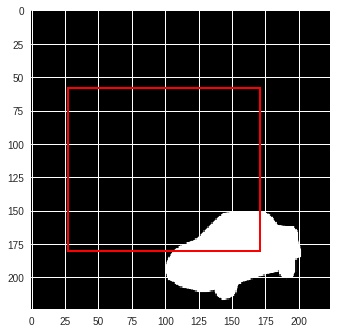

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[5])
rect = patches.Rectangle((img['xmin'][0],img['ymin'][0]),img['xmax'][0] - img['xmin'][0],img['ymax'][0] - img['ymin'][0],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.show()

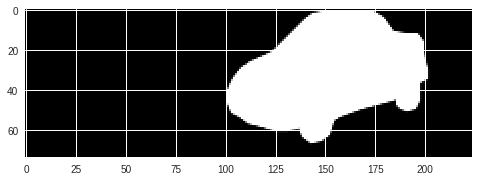

In [0]:
plt.imshow(t[5][150:224,0:224])

In [0]:
[0:200,25:200]

In [0]:
pred = np.zeros((9,4))
pred[0] = np.array([[0,1,2,3]])

In [0]:
pred

array([[0., 1., 2., 3.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
del pred

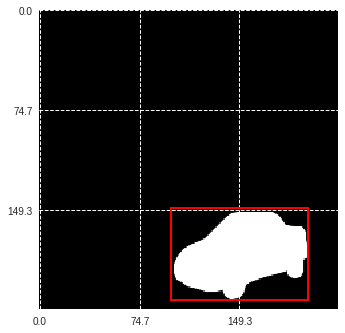

In [0]:
import matplotlib.ticker as plticker
fig,ax = plt.subplots(1)
ax.imshow(train_data[5])

intervals = 74.6667

loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

rect = patches.Rectangle((df['xmin'][5],df['ymin'][5]),df['xmax'][5] - df['xmin'][5],df['ymax'][5] - df['ymin'][5],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.grid(color='w',which='major', linestyle='--', linewidth=1)
plt.show()

In [0]:
for i in range(0,300,75):
  print(i)

0
75
150
225


In [0]:
for i in range(0,245,45):
  print(i)

0
45
90
135
180
225


In [0]:
l= []
for i in range(0,300,75):
  for j in range(i+75,300,75):
    for k in range(0,300,75):
      for m in range(k+75,300,75):
        l.append([i,j,k,m])
        break
    break

In [0]:
df.iloc[5][4:]

xmin     98
ymin    148
xmax    201
ymax    217
Name: 5, dtype: object

In [0]:
ctr = ((df.iloc[5][4]+df.iloc[5][6])/2,(df.iloc[5][5]+df.iloc[5][7])/2)

In [0]:
ctr

(149.5, 182.5)

In [0]:
ctr.iloc[50]

x_ctr    112.5
y_ctr    150.5
Name: 50, dtype: float64

In [0]:
grid[(grid['xmin'] >= ctr[0]) & (grid['ymax'] >=ctr[1])].index[0]

8

In [0]:
lable.head()

,xmin,ymin,xmax,ymax
0,14,65,215,216
1,12,46,210,193
2,28,50,211,177
3,64,59,160,176
4,21,69,203,199


In [0]:
ctr.head()

,x_ctr,y_ctr
0,114.5,140.5
1,111.0,119.5
2,119.5,113.5
3,112.0,117.5
4,112.0,134.0


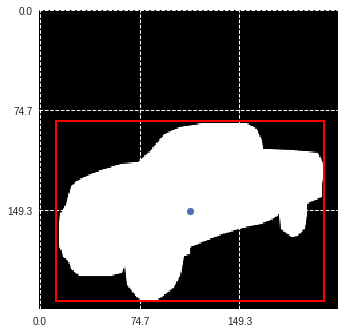

In [0]:
fig,ax = plt.subplots(1)
ax.imshow(t[50])

intervals = 74.6667

loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

rect = patches.Rectangle((df['xmin'][50],df['ymin'][50]),df['xmax'][50] - df['xmin'][50],df['ymax'][50] - df['ymin'][50],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.plot(19,26,'--',linewidth=5,color='firebrick')
plt.grid(color='w',which='major', linestyle='--', linewidth=1)
plt.scatter(ctr.iloc[50][0], ctr.iloc[50][1])
plt.show()

In [0]:
grid.head()

,xmin,xmax,ymin,ymax
0,0,75,0,75
1,0,75,75,150
2,0,75,150,225
3,75,150,0,75
4,75,150,75,150


In [0]:
ctr.iloc[50]

x_ctr    112.5
y_ctr    150.5
Name: 50, dtype: float64

In [0]:
grid

,xmin,ymin,xmax,ymax
0,0,75,0,75
1,0,75,75,150
2,0,75,150,225
3,75,150,0,75
4,75,150,75,150
5,75,150,150,225
6,150,225,0,75
7,150,225,75,150
8,150,225,150,225


In [0]:
grid[(grid['xmax'] >= ctr.iloc[50][0]) & (grid['ymax'] >=ctr.iloc[50][1])].index[0]

7

In [0]:
ctr.iloc[0][0],ctr.iloc[0][1]

(114.5, 140.5)

In [0]:
grid

,xmin,ymin,xmax,ymax
0,0,75,0,75
1,0,75,75,150
2,0,75,150,225
3,75,150,0,75
4,75,150,75,150
5,75,150,150,225
6,150,225,0,75
7,150,225,75,150
8,150,225,150,225


In [0]:
grid.head()

,ymin,ymax,xmin,xmax
0,0,75,0,75
1,0,75,75,150
2,0,75,150,225
3,75,150,0,75
4,75,150,75,150


In [0]:
ctr.head()

,x_ctr,y_ctr
0,114.5,140.5
1,111.0,119.5
2,119.5,113.5
3,112.0,117.5
4,112.0,134.0


In [0]:
len(ctr)

236

In [0]:
lable.head()

,xmin,ymin,xmax,ymax,width,height
0,14,65,215,216,201,151
1,12,46,210,193,198,147
2,28,50,211,177,183,127
3,64,59,160,176,96,117
4,21,69,203,199,182,130


In [0]:
ctr.iloc[0]

x_ctr    114.5
y_ctr    140.5
Name: 0, dtype: float64

In [0]:
abs(-20)

20

In [0]:
v= [1,2,3]
v[0:1]

[1]

In [0]:
del v

In [0]:
np.nan *5

nan